# Memory Encoder Test

In [1]:
# Libraries
import faiss
import nibabel as nib
import matplotlib.pyplot as plt
import torch
import json
from PIL import Image

from preprocessing import preprocessing_dinov2, preprocessing_sam2

In [2]:
from model.modeling.memory_encoder import MemoryEncoder
from model.modeling.retrieval import Retrieval
import torchvision.transforms.functional as TF
RV = Retrieval()
ME = MemoryEncoder()

memory_image = Image.open('/home/kdh/code/BME_Capstone1/FAISS/A00028185_axial_107.png')
memory_label = Image.open('/home/kdh/code/BME_Capstone1/FAISS/A00028185_axial_107_mask.png')
retrieval = RV(TF.to_tensor(memory_image))

Using cache found in /home/kdh/.cache/torch/hub/facebookresearch_dinov2_main
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


In [3]:
retrieval['image'][0].shape

torch.Size([3, 256, 256])

(-0.5, 191.5, 255.5, -0.5)

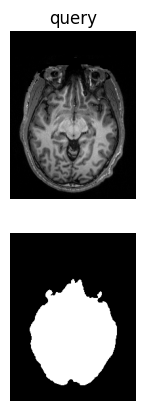

In [4]:
plt.subplot(2, 1, 1)
plt.imshow(memory_image, cmap='gray')
plt.title('query')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(memory_label, cmap='gray')
plt.axis('off')

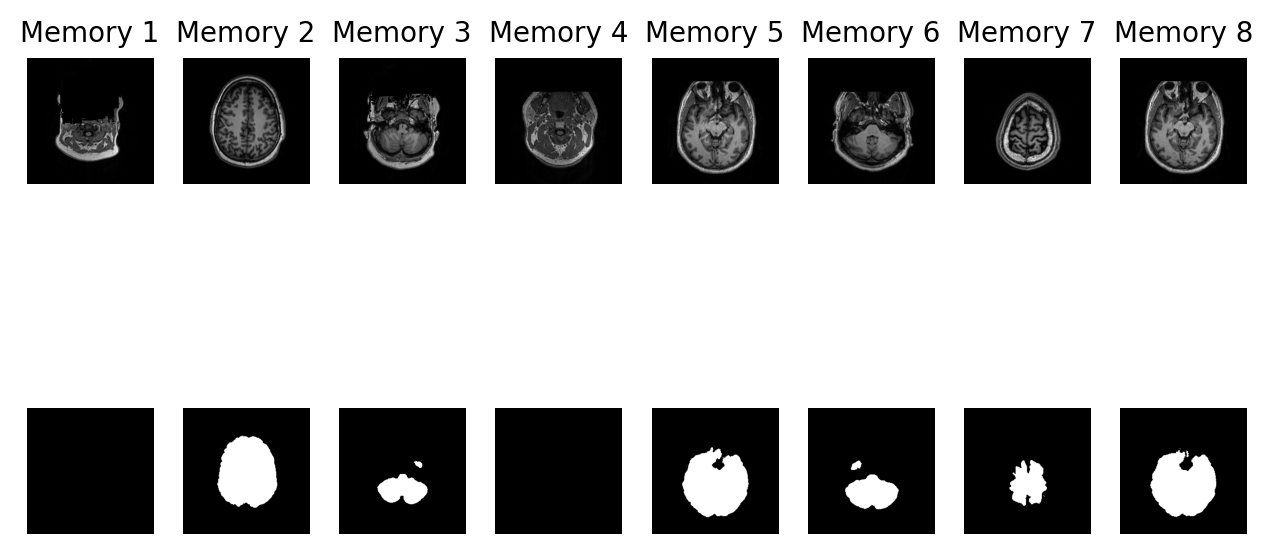

In [5]:
plt.figure(dpi=200)
for i in range(8):
    plt.subplot(2, 8, i+1)
    plt.imshow(retrieval['image'][i].permute(1,2,0), cmap='gray')
    plt.title(f'Memory {i+1}', fontsize=10)
    plt.axis("off")

for i in range(8):
    plt.subplot(2, 8, i+9)
    plt.imshow(retrieval['mask'][i].squeeze(0), cmap='gray')
    plt.axis("off")

plt.tight_layout()
    

In [6]:
mem_feat, mem_pos = ME(retrieval)
print(mem_feat.shape)

torch.Size([8, 64, 16, 16])


In [7]:
print(mem_feat.mean(), mem_feat.std())

tensor(0.2643, device='cuda:0', grad_fn=<MeanBackward0>) tensor(1.2018, device='cuda:0', grad_fn=<StdBackward0>)


In [9]:
mem_feat.shape

torch.Size([8, 64, 16, 16])